# Introduction to Plotting in Python

This notebook provides an introduction to creating graphs using the matplotlib library.  It also illustrates several ways of importing and organizing data.

Perhaps the most basic way is to import data using the numpy library.  Here, data are read from a comma-delimited text file into a two-dimensional array. Individual columns from the array are then read into separate variables.

In [1]:
import numpy as np
data = np.genfromtxt("my_data.csv", delimiter=",", skip_header=1)
year = data[:,0]
pm25 = data[:,1]
print('Result is:')
print(year, pm25)

Result is:
[2015. 2016. 2017. 2018.] [10.1  8.3 10.1 10.8]


The same thing can be accomplished in perhaps a more intuitive way using the Pandas library.

In [2]:
import pandas as pd
df = pd.read_csv('my_data.csv')
year = df['year']
pm25 = df['pm2.5']
print('Result (in slightly different format than above) is: ')
print(year, pm25)

Result (in slightly different format than above) is: 
0    2015
1    2016
2    2017
3    2018
Name: year, dtype: int64 0    10.1
1     8.3
2    10.1
3    10.8
Name: pm2.5, dtype: float64


Either of the above approaches work--only one is required. However, unless there is value in doing multi-dimensional analysis, Pandas is probably more powerful, but there are advantages to both libraries.  We will use both numpy and pandas later in this course.

Pandas also almost allows you to cut and paste from MS Excel.  To accomplish this, copy the data you are interested in, then use the pd.read_clipboard() function.

In [3]:
pd.read_clipboard();

To view a variable, simply type that variable's name (or use print statemetns, as above). A semicolon at the end of a line suppresses output.

In [4]:
pm25

0    10.1
1     8.3
2    10.1
3    10.8
Name: pm2.5, dtype: float64

This displays a portion of the dataset--in Pandas, it's known as the head of the dataframe (i.e., the data table). Try repeating the above, but instead if displaying pm25, try data (a numpy array) or df (a full pandas dataframe).  Jupyter notebooks are particularly adept at making dataframes look nice.

A plot can be created by importing the necessary library, then creating objects representing the figure and then any subfigures (the actual charts--figures can have more than one).

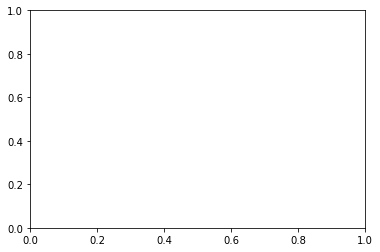

In [5]:
import matplotlib.pyplot as plt
figure1, subfig = plt.subplots()

We can add data to the plot using the .plot() method, then redisplay the figure by typing the name of the figure. In this example, the argument 'ro' indicates that we want to plot red points.  We will use the label later.

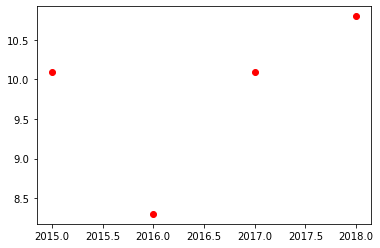

In [6]:
subfig.plot(year, pm25, 'ro', label = 'Point')
figure1  #this works because we defined "figure" two lines ago

We can add a line between points by calling the plot method again, this time without using the 'ro' argument.  We can also set labels and legend properties.  In the label for the y axis, we added the superscript three symbol by surrounding the code "^3" with the \\$ symbol. Anything between the \\$ symbols is evaluated as a Latex expression. This is a convenient way to have access to mathematical notation and Greek letters. 

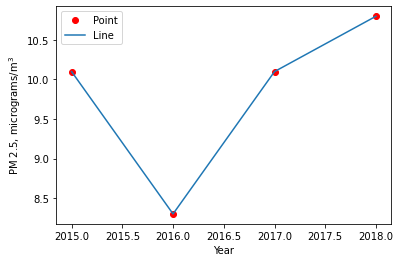

In [7]:
subfig.plot(year[0:4], pm25[0:4], label='Line')
subfig.set_ylabel('PM 2.5, micrograms/m$^3$')
subfig.set_xlabel('Year')
subfig.legend()
figure1

## Doing some analysis

A simple analytical excercise may involve adding a regression line through the datapoints. We can accomplish this relatively easily using the scypy.stats package. Here, we compute the slope and y intercept using the stats.linregress() method, then compute the value of y for each value of x (time for us).  This results in a new dataset we can plot as a line. 

In [8]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(year, pm25)
x = np.arange(2015,2019,1)  #this creates regular values between 2015 and 2019 at interval 1
y = slope*x+intercept

We now add this regression line to the figure and call the legend method again to ensure that the regression line is included in the legend.

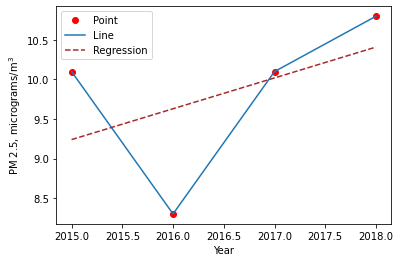

In [9]:
subfig.plot(x,y,'--',label='Regression',color='brown')
subfig.legend()
figure1

## Quick and dirty plotting approach in Pandas

If you imported data as Pandas (as opposed to numpy), there is a very fast way to plot, even without importing the matplotlib library. The dataframe's plot.scatter() method makes creating a simple graph very straighforward. The drawback to this approach is that it can be more difficult to add additional series to the plot, but for a single graph, this works fine.

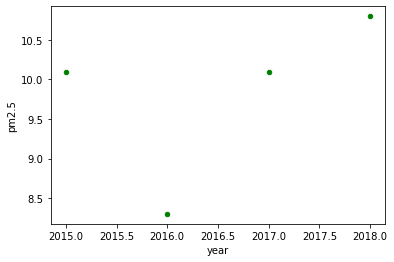

In [10]:
subfigure2 = df.plot.scatter(x='year', y='pm2.5', color = 'green')

Note that the df.plot method returns the same type of object we were referring to previously as a "subfigure"--more precisely, this is called a Matplotlib axis, presumably because each subfigure in a figure has it's own set of x- and y- axes.  

## Two-part figures

We can create multi-part figures using a very similar syntax.  Here, we create a new figure that we call figure 3.  However, this time, we include two separate subfigures in the figure. The argument in the plt.supblots() call tells the methods whether there are two figures in the figures are distributed vertically or horizontally. 

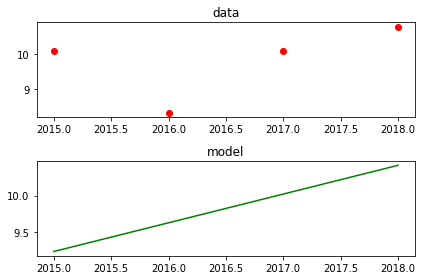

In [11]:
figure3, (subfig2, subfig3) = plt.subplots(2,1)
subfig2.plot(year, pm25, 'ro')
subfig2.set_title('data')
subfig3.plot(x, y, 'g-')
subfig3.set_title('model')
figure3.tight_layout()

This produces two separate subfigures that share a common x axis. 

Add axis labels to each sub-figure (or, using the more standard nomenclature, to each axis) individually. Here, we'll shorten the label by addign a greek letter between the \\$ symbols. The backslash is required for this to work.

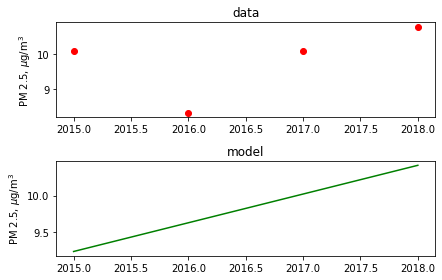

In [12]:
subfig2.set_ylabel('PM 2.5, $\mu$g/m$^3$')
subfig3.set_ylabel('PM 2.5, $\mu$g/m$^3$')
figure3

## Other built-in plots

There are MANY other types of built-in plots in matplotlib and Pandas, and there are many online tutorials for creating.  Here are just a few examples.

### Box Plot

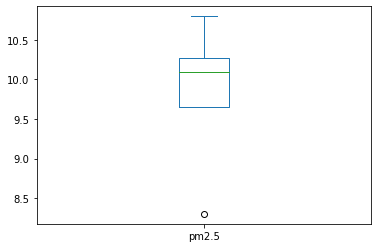

In [13]:
figure4, subfig4 = plt.subplots()
figure4 = df['pm2.5'].plot.box()

### Bar Chart

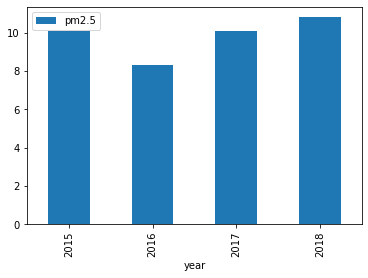

In [14]:
figure5 = df.plot.bar(x='year',y='pm2.5')

### Pie Chart

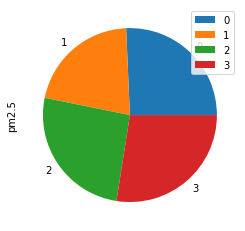

In [15]:
figure_pie = df.plot.pie(y='pm2.5')

## Importing, cleaning, and graphing a larger dataset

Here, we read a large dataset that was downloaded from an external source. The data file must be either stored in the same folder as the Jupyter Notebook or a full path must be provided. The data includes an eight-line header that is not relevant for analysis, so we ignore this when we import the data using the "skiprows" argument. We also want Pandas to know these are dates and times, so we import with the parse_dates argument set to True.

Note that there is also a function called read_excel() that allows you to directly read data from a MS Excel spreadsheet. 

In [16]:
df2 = pd.read_csv('AirQualityTelemetryData.csv', skiprows=8) 
df2

,Observation Time,Seattle 10th & Weller - Pm25MetOneBam - ug/m3 - 1Hr Avg
0,1/1/2018 12:00:00 AM,19.0
1,1/1/2018 1:00:00 AM,15.0
2,1/1/2018 2:00:00 AM,14.0
3,1/1/2018 3:00:00 AM,9.0
4,1/1/2018 4:00:00 AM,12.0
...,...,...
8779,1/1/2019 7:00:00 PM,18.0
8780,1/1/2019 8:00:00 PM,19.0
8781,1/1/2019 9:00:00 PM,17.0
8782,1/1/2019 10:00:00 PM,25.0


There are 8784 rows of data in the table, so we only the first and last five rows of the imported data are displayed here. The column headings are a little long, so now we assign names to each column.  It is also convenient to tell Pandas which column you will use as your x axis (something referred to as the "index" in Pandas).  We would very likely plot against time, so we use the 'datetime' column here as the index.  This will also clean up how the table looks if we try to display it.  

In [17]:
df2.columns = ['datetime','PM2.5']
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2=df2.set_index(['datetime'])
df2

,PM2.5
datetime,
2018-01-01 00:00:00,19.0
2018-01-01 01:00:00,15.0
2018-01-01 02:00:00,14.0
2018-01-01 03:00:00,9.0
2018-01-01 04:00:00,12.0
...,...
2019-01-01 19:00:00,18.0
2019-01-01 20:00:00,19.0
2019-01-01 21:00:00,17.0


The data now looks much cleaner and is easier to refer to later when we graph it. 

We now do the same thing for a couple other datasets.

In [18]:
df3 = pd.read_csv('Nephelometer.csv', skiprows=8) 
df3.columns = ['datetime', 'PM2.5'] 
df3['datetime'] = pd.to_datetime(df3['datetime'])
df3=df3.set_index(['datetime'])

df4 = pd.read_csv('MetOne.csv', skiprows=8) 
df4.columns = ['datetime', 'PM2.5'] 
df4['datetime'] = pd.to_datetime(df4['datetime'])
df4=df4.set_index(['datetime'])
df4

,PM2.5
datetime,
2018-01-01 00:00:00,14.0
2018-01-01 01:00:00,16.0
2018-01-01 02:00:00,18.0
2018-01-01 03:00:00,16.0
2018-01-01 04:00:00,17.0
...,...
2018-12-31 19:00:00,11.0
2018-12-31 20:00:00,14.0
2018-12-31 21:00:00,23.0


We can now add the various parts of our imported data to a new figure.  Here, we'll create a figure that includes two subfigures (aka two axes).  In the first subfigure, we plot the 10th and Weller data, which we previously imported to dataframe df2.  

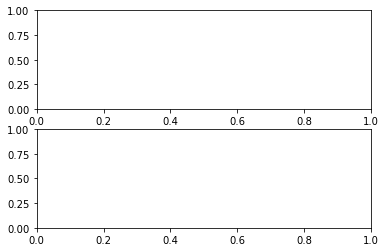

In [19]:
figure6, (subfig6, subfig7) = plt.subplots(2,1)

Data are added to the plot using the Pandas dataframe.plot() function.  Here, we only add to the upper of the two subplots (or axes).

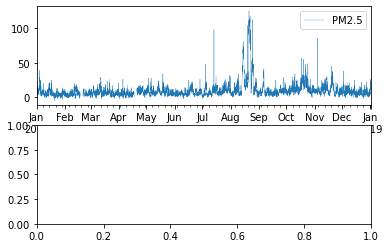

In [20]:
df2.plot(ax=subfig6, linewidth=0.3) 
figure6

Note that the legend entry defaults to the name of the column in the dataframe.This can be changed later.

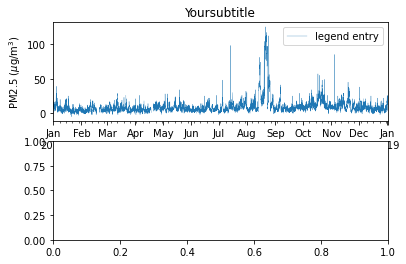

In [21]:
subfig6.set_ylabel('PM2.5 ($\mu$g/m$^3$)') #interprets latex string between $$ symbols. see https://matplotlib.org/users/mathtext.html
subfig6.set_xlabel('Your x label')
subfig6.set_title('Yoursubtitle')
subfig6.legend(['legend entry'])
figure6

### Adding additional data to the figure
We can plot any additional date we like.  Here, we ensure it ends up in the lower subfigure by specifying the appropriate one in using the "ax" argument.

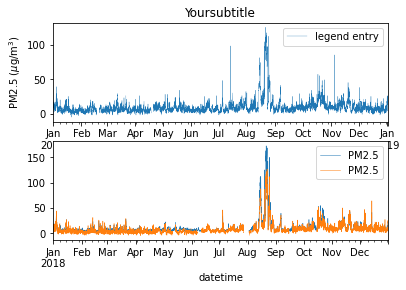

In [22]:
df3.plot(ax=subfig7, label='file 2',linewidth=0.5)
df4.plot(ax=subfig7, label='file 3',linewidth=0.5)
figure6

Note that the legend entries for the two datasets in the lower graph are identical, and once again are simply the names of the columns in our dataframes.  Unfortunately, it is difficult to set these before creating the graph using the pandas dataframe.plot method.  However, they can be reset later, and additional axis labels can be created.  An alternative way of creating a graph, using matplotlibs plt.plot() method, will allow labels to be set upon plot instantiation, but the horizontal axis labels are generally cleaner when using the pandas dataframe.plot method.

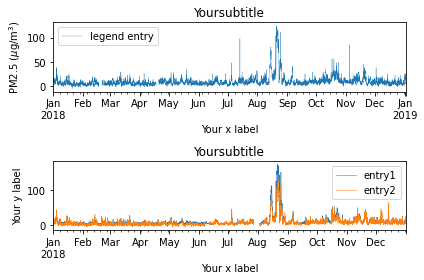

In [23]:
subfig7.set_ylabel('Your y label')  #interprets latex string designated between $$ symbols. String passed using the r'\char'
subfig7.set_xlabel('Your x label')
subfig7.legend(['entry1','entry2'])
subfig7.set_title('Yoursubtitle')
figure6.tight_layout()
figure6

### Plotting partial datasets
If a dataframe's index has been set to an appropirately parsed datetime column, it is possible to select any date range of interest before graphing.  Here a small portion of the graph in the upper figure is added to the lower figure.

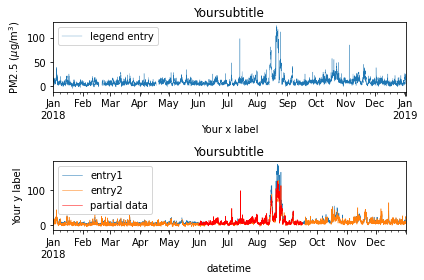

In [24]:
df2['6-1-2018':'9-15-2018'].plot(ax=subfig7, linewidth=0.5, color='red')
subfig7.legend(['entry1','entry2','partial data'])
figure6

## Figure control

### Resizing an existing figure

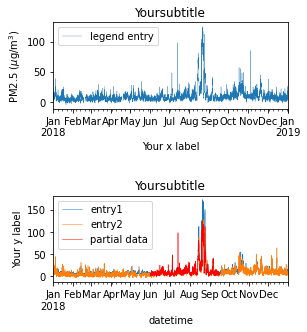

In [25]:
figure6.set_size_inches(4,5)
figure6

### Interactive figures
To make the plot interactive, Jupyter Notebook (not Python) provides a magic command that you can enter in the Jupyter Notebook prompt. If developing in Spyder, you can set this as the default option by going to Tools-->Preferences-->IPython console-->Graphics and then selecting Automatic for the backend. In any case, once invoked, new figures will open in their own resizable windows.  Here, the code for creating the figure above is given.  To ensure that zooming in on one axis results in the same date/time range on the other, the sharex keyword is used when the figure is initialized.

In [26]:
%matplotlib auto

Using matplotlib backend: TkAgg


From here on, any new figures will automatically show up both inline and in the interactive figure window.

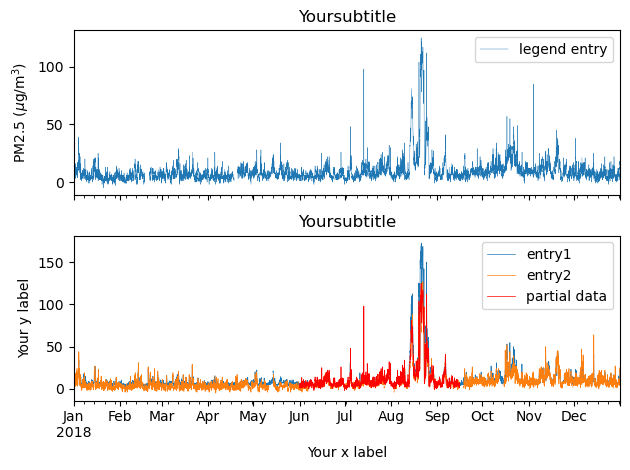

C:\Users\WesLa\anaconda3\lib\site-packages\ipykernel\eventloops.py:256: RuntimeWarning: coroutine 'Kernel.do_one_iteration' was never awaited
  self.func()


In [27]:
figure8, (subfig8, subfig9) = plt.subplots(2,1, sharex=True)
df2.plot(ax=subfig8, label='file 1',linewidth=0.3)
subfig8.set_ylabel('PM2.5 ($\mu$g/m$^3$)') 
subfig8.set_title('Yoursubtitle')
subfig8.legend(['legend entry'])
df3.plot(ax=subfig9, label='file 2',linewidth=0.5)
df4.plot(ax=subfig9, label='file 3',linewidth=0.5)
df2['6-1-2018':'9-15-2018'].plot(ax=subfig9, linewidth=0.5, color='red')
subfig9.set_ylabel('Your y label') 
subfig9.set_xlabel('Your x label')
subfig9.legend(['entry1','entry2','partial data'])
subfig9.set_title('Yoursubtitle')
figure8.tight_layout()
figure8

## On-your-own activity (Part of the homework due Thursday)
Download a comma-delimited textfile from the Puget Sound Clean Air Agency representing PM2.5 measurements at the 10th and Weller station (near the site of the proposed urban garden we discussed last week). Download hourly data for the entire period between 1/1/2020 and 1/1/2022.  Data are available here:

https://secure.pscleanair.org/airgraphing

Download for the site “Seattle 10th and Weller”, then for parameter “PM 2.5 MetOne Bam” and calculation “1-hour average v(7)”.  Click “Go” to produce a graph in the window.  Then click the csv button in the lower right to download the file.  Open the file in Excel and note that the data appear to start on line 10 of the file. This should be the same format as the data used in the above examples. The first column is date/time, and the second is the PM2.5 measurement. 

Repeat the process for one other station in Seattle.  This time, include one other PM 2.5 Method.  Note that the method most equivalent to the Honeywell PM2.5 sensor is the Nephelometer method, which depends on light scattering. Plot this other station on the second axis.

Use the material in this notebook to graph the data over the course of the year for the 10th and Weller station (only one sensor available) and your other station. If you can find one with more than one PM2.5 measurement method, include the measurements from both methods on that figure. Turn in the graph, along with a descriptive caption, as part of your assignment on Thursday. 